In [94]:
%run "Eigendecomposition_Source_Code.ipynb"

Loading: Eigendecomposition_Source_Code.ipynb...
Done at: 2023/09/01 11:39:40


In [119]:
import pickle
file = open('/home/jovyan/work/Human_Hippocampus/StitchedDataUpdated.pkl', 'rb')
stitched_data = pickle.load(file)
file.close()

file2 = open('/home/jovyan/work/Human_Hippocampus/Ari/Pickled_Randomizations/PickledRands_seed-5000_KH_2023-08-25_11-52-32.pkl', 'rb')
randoms = pickle.load(file2)
file2.close()

random_select = {"Randomization 01":randoms[0],
                 "Randomization 02":randoms[1],
                 "Randomization 03":randoms[2],
                 "Randomization 04":randoms[3],
                 "Randomization 05":randoms[4],
                 "Randomization 06":randoms[5],
                 "Randomization 07":randoms[6],
                 "Randomization 08":randoms[7],
                 "Randomization 09":randoms[8],
                 "Randomization 10":randoms[9],
                }

In the article, <i> The Log-dynamic Brain: how Skewed Distributions affect Network Operations</i>, György Buzsáki & Kenji Mizuseki describe how many of the brain's functions and operational levels follow a skewed distribution, with long asymmetric tails. They relate this to the Weber-Fechner Law which states response to stimulus follows the log of the stimulus amplitude, a law which can be observed in many places but notably to me, languages and more specifically word usage. The authors of the paper posit that the skewed distribution of activity in the brain follows at least similar laws and thus their distributions being lognorma, meaning taking the log of our data histograms would result in a more gaussian distribution. This transformation should occur regardless of used based. While we do see the skewed tails described in the article in our own recorded data, taking the log, base 10, of our STTC latency distribution we unfortunately do not seem to get something resembling a bell-curve. Using the stitched, unperturbed, data recorded from the CA1 Hippocampus region, we see the transformation resembles a more "sawtooth" distribution. This may be due to method error, an issue with the recording or potential fallout from overzealous cutting when turning the original unperturbed data into the stitched dataset. 

As for network Synchrony, araster of our CA1 activity does somewhat match with what is described occuring in CA3 in the article. We see periodic, strong, synchronized events followed by smaller events. This is also represented in the STTC histogram, with a long tail of a few large high-correlation events, with a lot of low-correlation events clustered around the 0 axis. This would point to it being a lognormal distribution however we fail to replicate the bell-curve distribution which makes me believe that it is a problem with our method of taking the log of the STTC. 

Moving forward, I would like to pursue two paths. The first is rather straightforward, we investigate what might be causing the saw-tooth shape in the log distribution, see if we can rectify any errors. Failing to do so would make me question the validity of the dataset we are currently using for the majority of our analysis. Secondly, I would like to attempt to see the distribution of the firing rate patterns, along with their log-transform to see if it matches the results found in Buzsáki & Mizuseki's paper. What might also be interesting is seeing if we can differentiate between pyramidal- and interneurons and see who each of their individual firing rates line up.  

# <font color="green">Functions

In [191]:
def hist_and_bell(array, bin_count=40):
    flat_array = array.flatten()
    #flat_array += 1
    mean = np.mean(flat_array)
    median = np.median(flat_array)
    std = np.std(flat_array)
    
    #flat_plus_one = flat_array #+ 1
    log_array = np.log(flat_array)
    mean_log = np.mean(log_array)
    median_log = np.median(log_array)
    
    """positive_logs = np.where(flat_array>=0)
    mean_log = np.mean(log_array)
    median_log = np.median(log_array)"""
    """
    log_array = np.log(flat_plus_one)
    mean_log = np.mean(log_array)
    median_log = np.median(log_array)
    """
    
    fig, plts = plt.subplot_mosaic("AB", figsize=(24,8))
    
    #plts["A"].plot(flat_array, y, color="black")
    #plts["A"].hist(flat_array, bins=bin_count)
    plts["A"].hist(flat_array, density=True, bins=bin_count)
    plts["A"].axvline(x=mean, color='blue', linewidth=1, label=f'mean = {mean:.4f}')
    plts["A"].axvline(x=median, color='red', linewidth=1, label=f'Median = {median:.4f}')
    plts["A"].set_xlabel("Value")
    plts["A"].set_ylabel("Density")
    plts["A"].set_title("Original Array")
    plts["A"].legend()
    
    
    plts["B"].hist(log_array, density=True, bins=bin_count)
    plts["B"].axvline(x=log_mean, color='blue', linewidth=1, label=f'mean = {log_mean:.4f}')
    plts["B"].axvline(x=log_median, color='red', linewidth=1, label=f'Median = {log_median:.4f}')
    plts["B"].set_xlabel("Value")
    plts["B"].set_ylabel("Density")
    plts["B"].set_title("Log of Array")
    plts["B"].legend()
    
    
    
def calculate_mean_firing_rates(spike_data):
    mean_firing_rates = []
    for neuron_spikes in spike_data.train:
        num_spikes = len(neuron_spikes)
        time_duration = spike_data.length / 1000  # Assuming spike times are in milliseconds
        firing_rate = num_spikes / time_duration
        mean_firing_rates.append(firing_rate)
    return np.array(mean_firing_rates)
    

# Work

In [4]:
Corr = correlation(stitched_data)
STTC = get_sttc(stitched_data)
Toep = toeplitz(Corr)
    
Wcorr, Ucorr = eigenvalues_eigenvectors(Corr)
Wsttc, Usttc = eigenvalues_eigenvectors(STTC)
Wt, Ut = eigenvalues_eigenvectors(Toep)

We plot a histogram of the STTC matrix values, notice the long tail

/tmp/ipykernel_371141/2162628736.py:14: RuntimeWarning: invalid value encountered in log
  log_array = np.log(flat_plus_one)


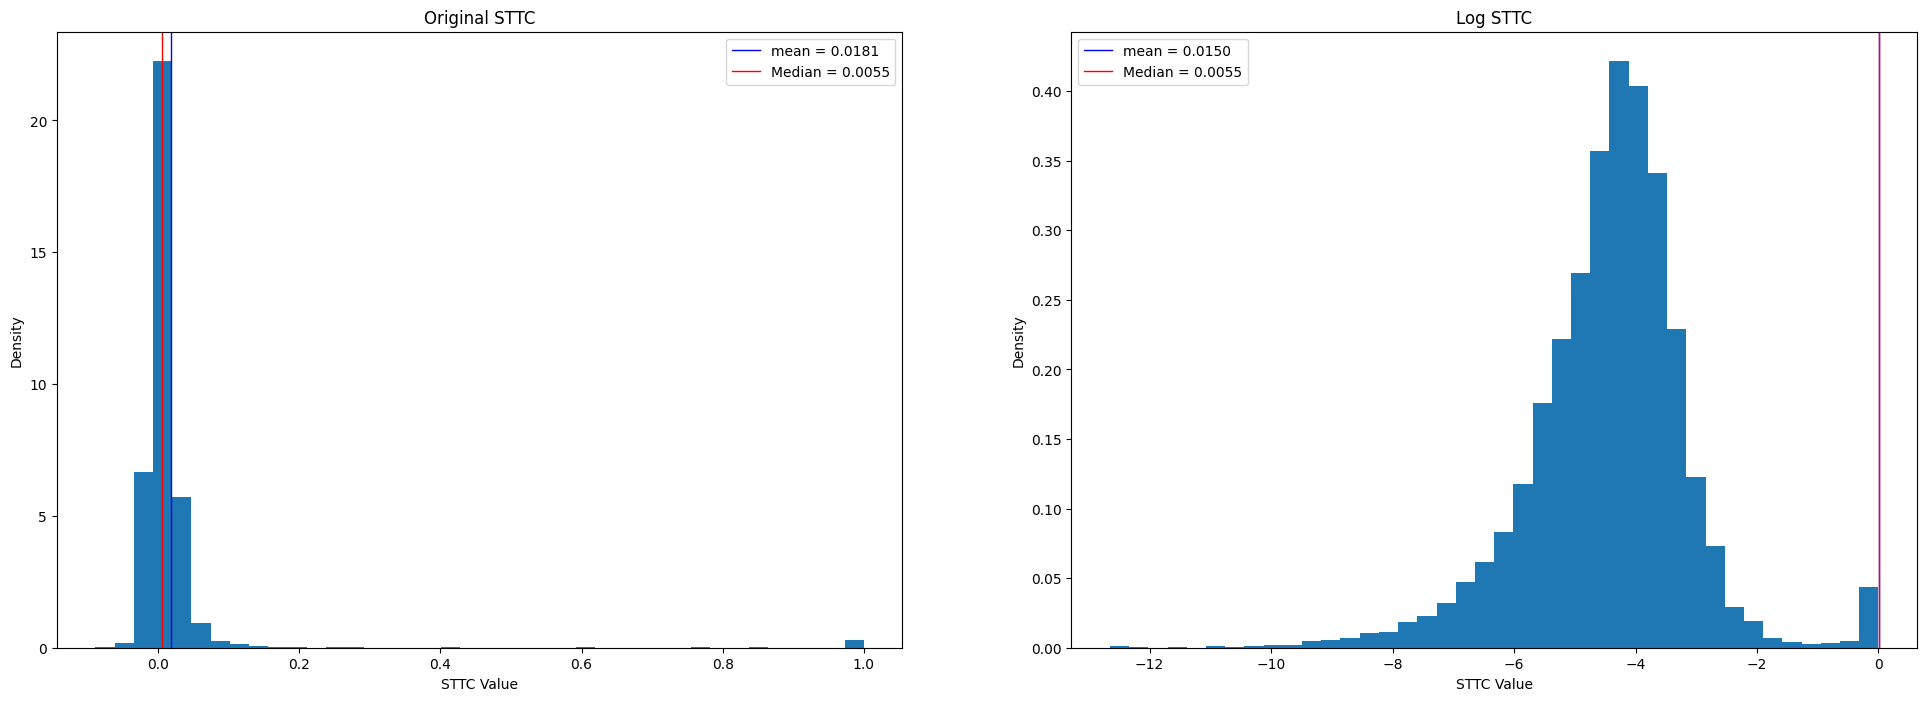

In [177]:
hist_and_bell(STTC)

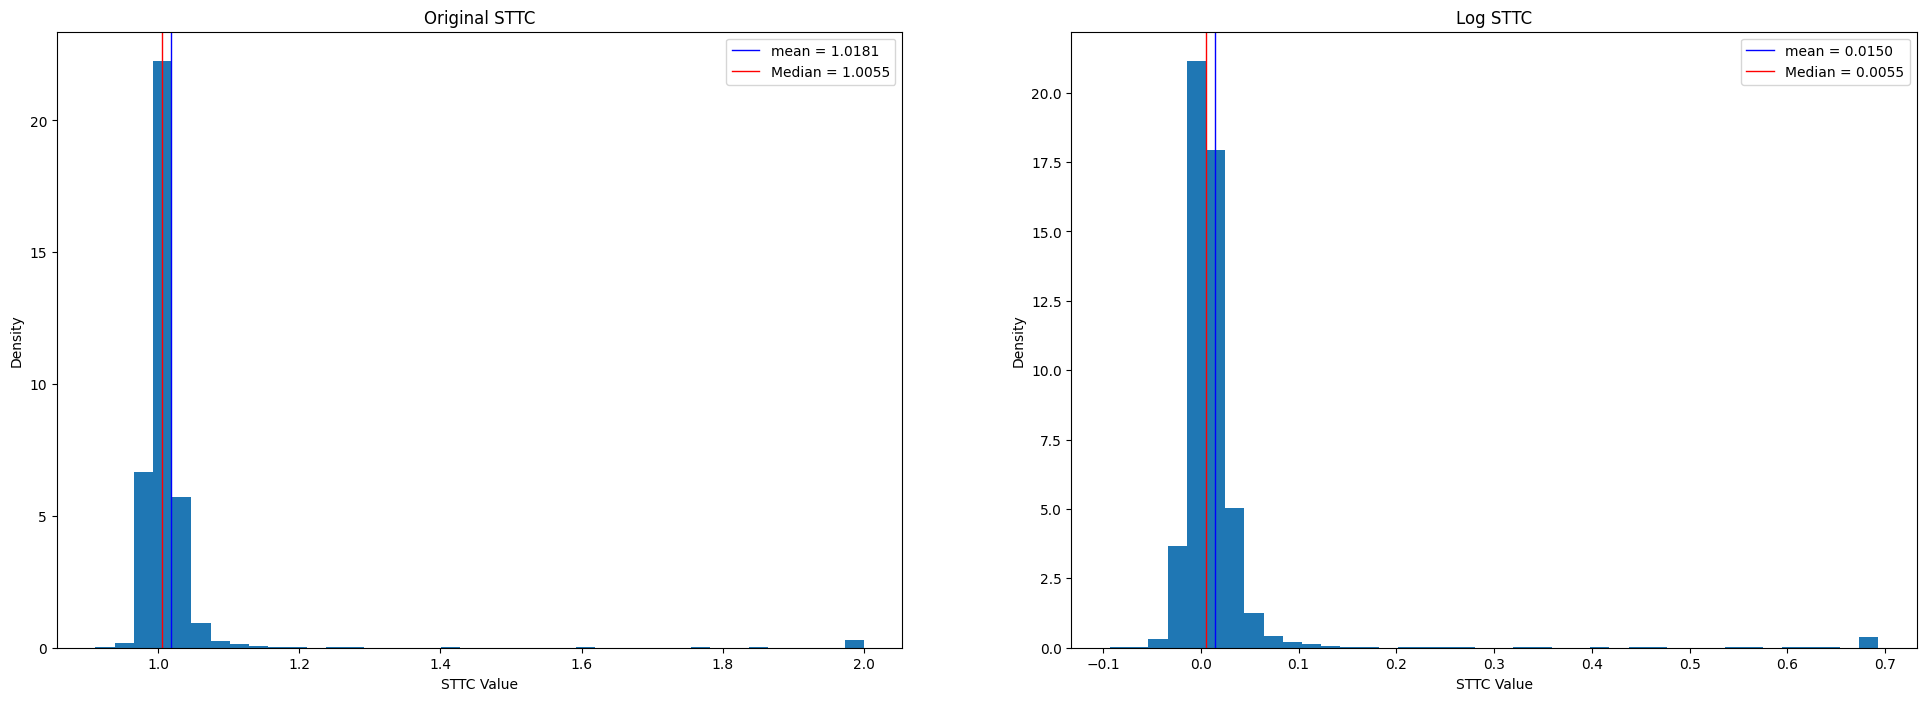

In [179]:
hist_and_bell(STTC)

In [143]:
sttc_pruned = np.where(STTC<0.6, STTC, STTC*0)

In [155]:
sttc_pruned2 = np.where(STTC<0.3, STTC, STTC*0)

In [144]:
sttc_pruned

array([[ 0.        ,  0.17236256,  0.02136   , ...,  0.27922681,
         0.01490659,  0.02956056],
       [ 0.17236256,  0.        ,  0.02384985, ...,  0.09116993,
         0.00758751,  0.02172237],
       [ 0.02136   ,  0.02384985,  0.        , ...,  0.022238  ,
         0.01059551,  0.00725796],
       ...,
       [ 0.27922681,  0.09116993,  0.022238  , ...,  0.        ,
        -0.00167902,  0.03368692],
       [ 0.01490659,  0.00758751,  0.01059551, ..., -0.00167902,
         0.        ,  0.03842833],
       [ 0.02956056,  0.02172237,  0.00725796, ...,  0.03368692,
         0.03842833,  0.        ]])

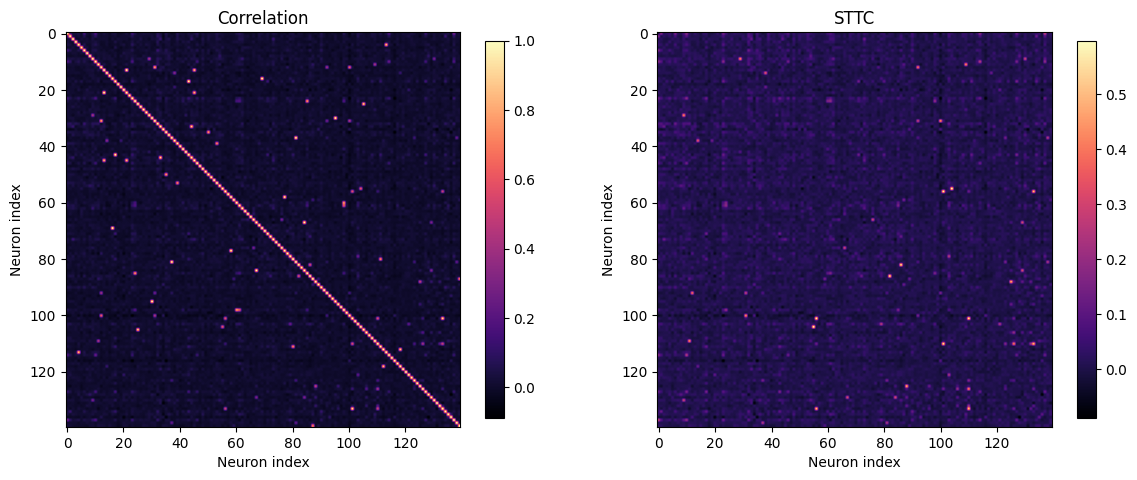

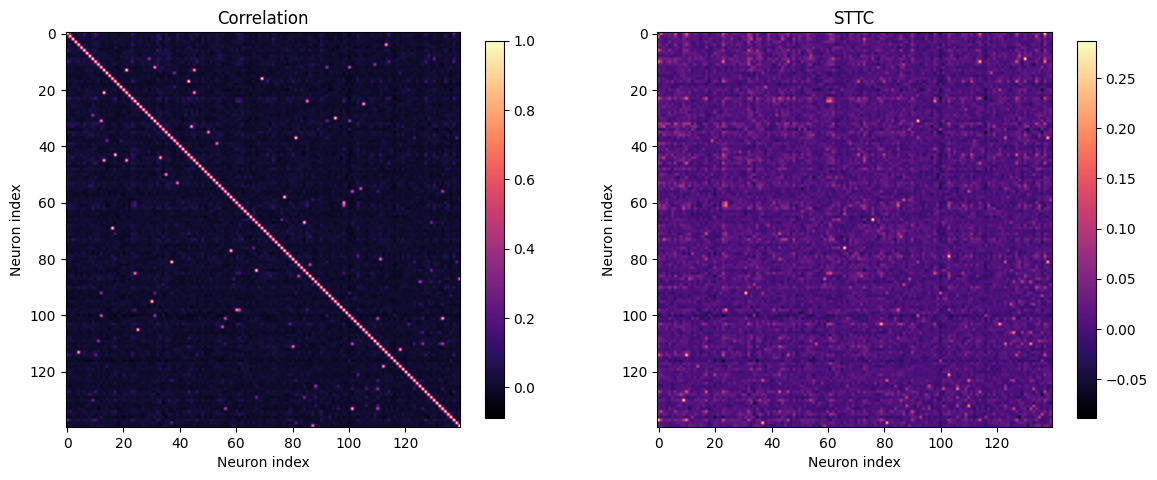

In [156]:
corrMethPlots(STTC, sttc_pruned)
corrMethPlots(STTC, sttc_pruned2)

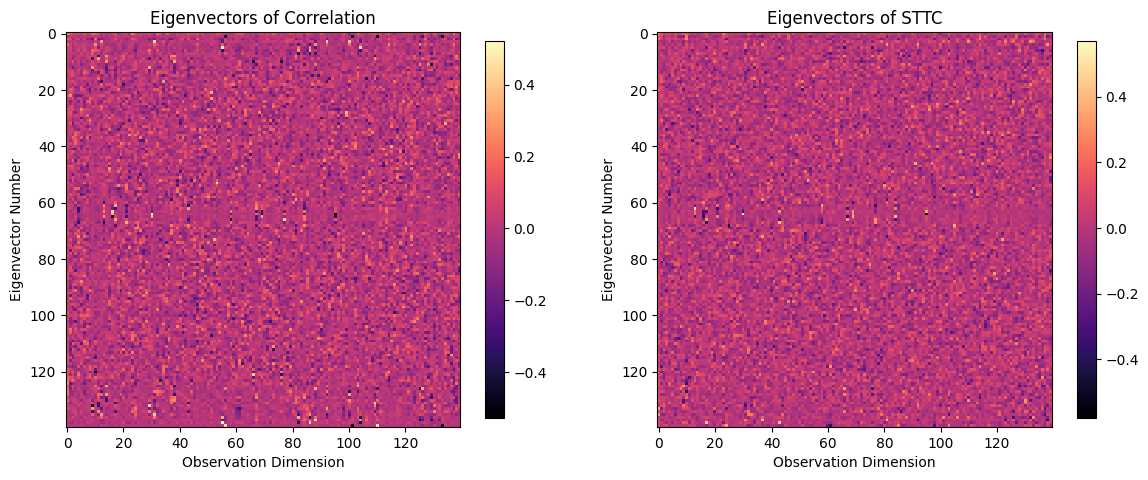

In [158]:
PWsttc, PUsttc = eigenvalues_eigenvectors(sttc_pruned)
PWsttc2, PUsttc2 = eigenvalues_eigenvectors(sttc_pruned2)

plot_evectmatrix(PUsttc, PUsttc2)

/tmp/ipykernel_371141/2696923937.py:11: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array


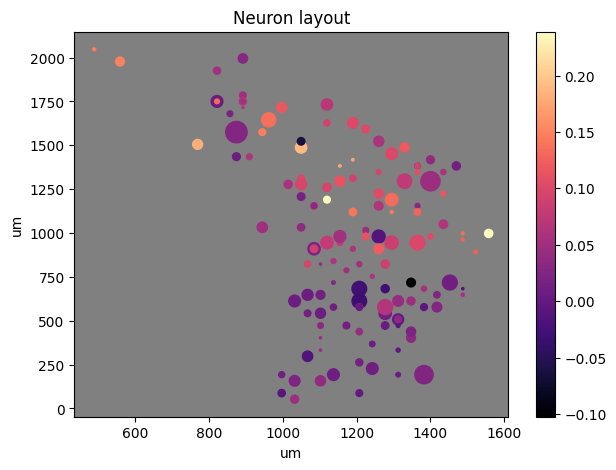

In [199]:
evectLayout(stitched_data, Usttc[:,0], threshold=1000)

/tmp/ipykernel_371141/2696923937.py:11: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array


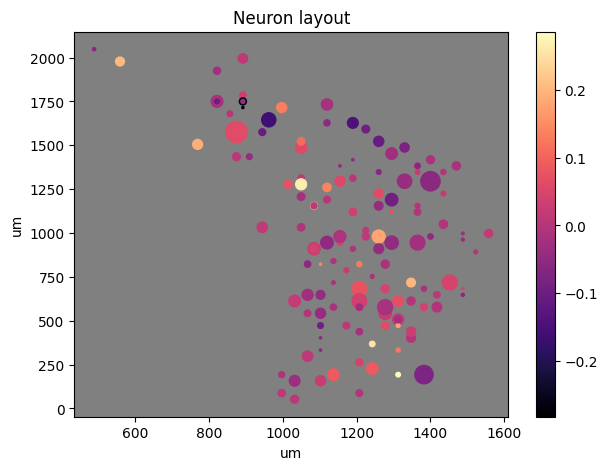

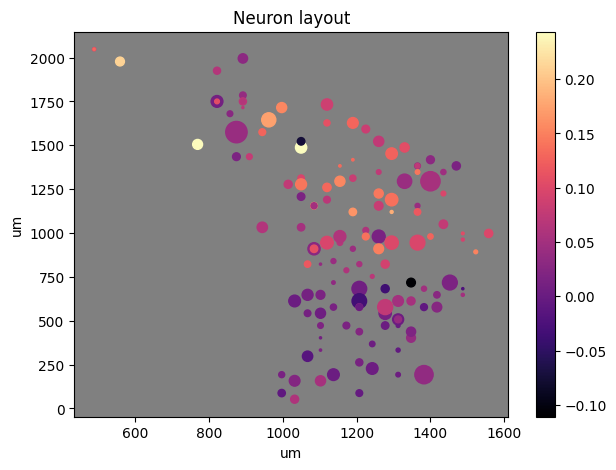

In [200]:
evectLayout(stitched_data, PUsttc[:,4], threshold=1000)
evectLayout(stitched_data, PUsttc2[:,0], threshold=1000)

In [146]:
flattened_pruned = sttc_pruned.flatten()

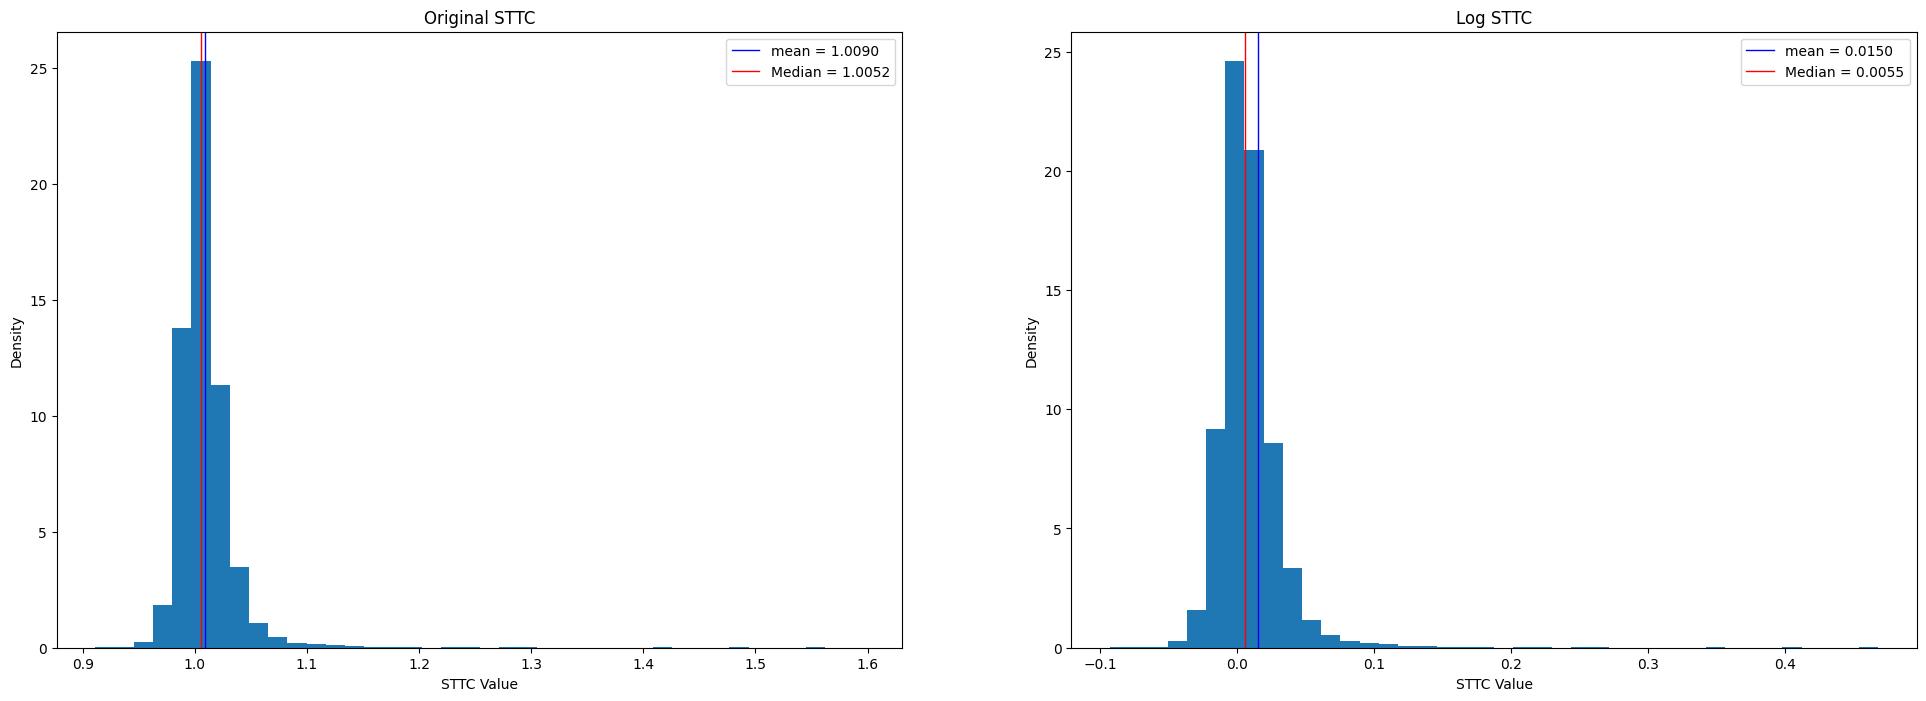

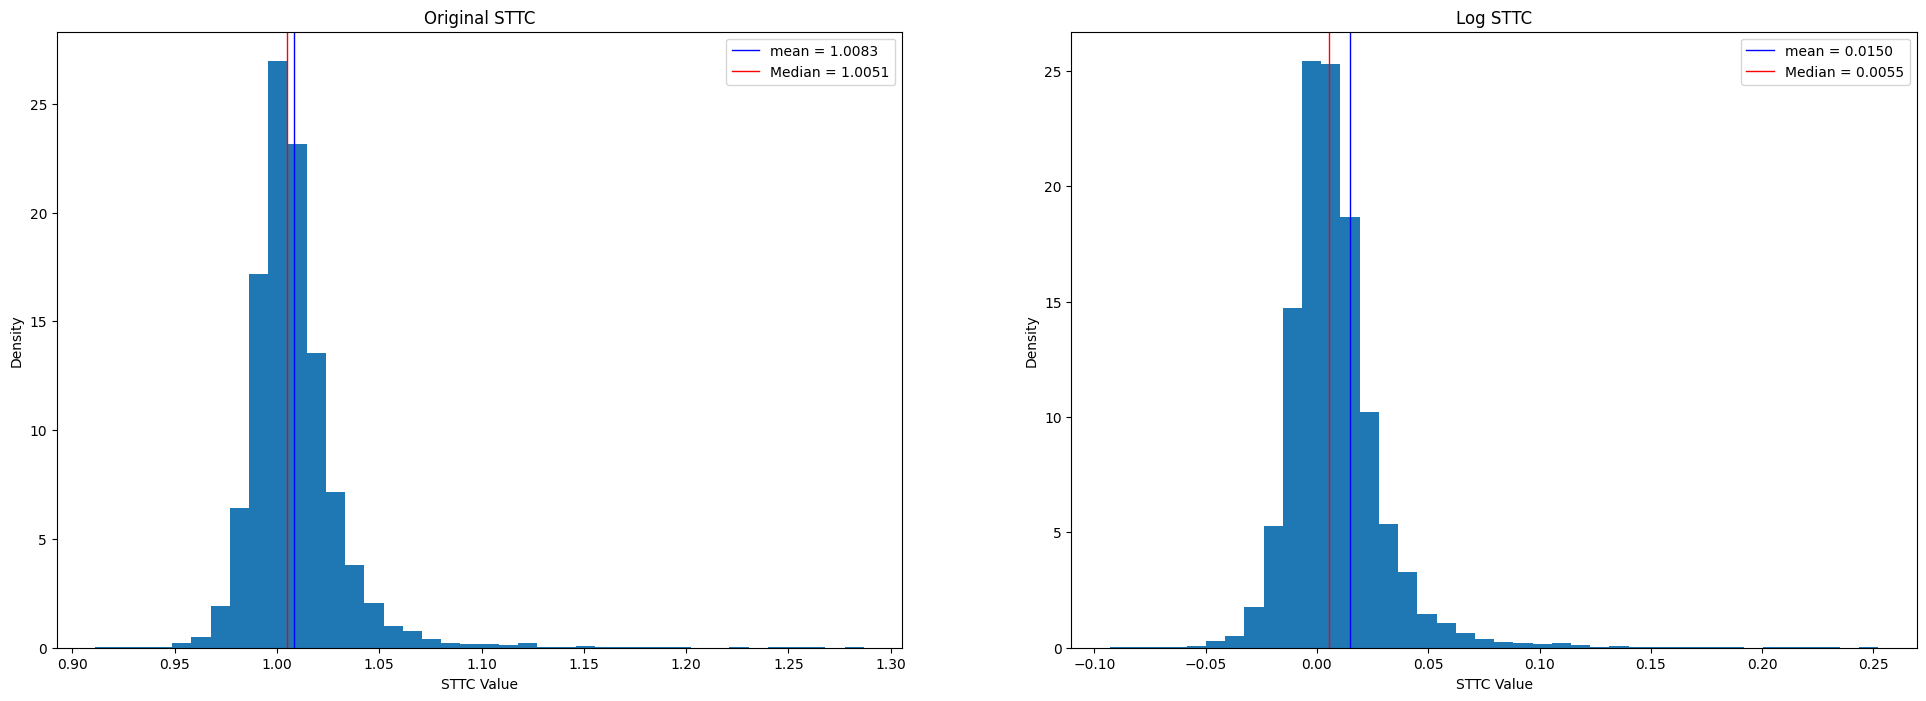

In [180]:
hist_and_bell(sttc_pruned)
hist_and_bell(sttc_pruned2)


/tmp/ipykernel_371141/550947472.py:9: RuntimeWarning: divide by zero encountered in log
  log_array = np.log(flat_array)
/tmp/ipykernel_371141/550947472.py:9: RuntimeWarning: invalid value encountered in log
  log_array = np.log(flat_array)


ValueError: supplied range of [-inf, -0.5161562787371695] is not finite

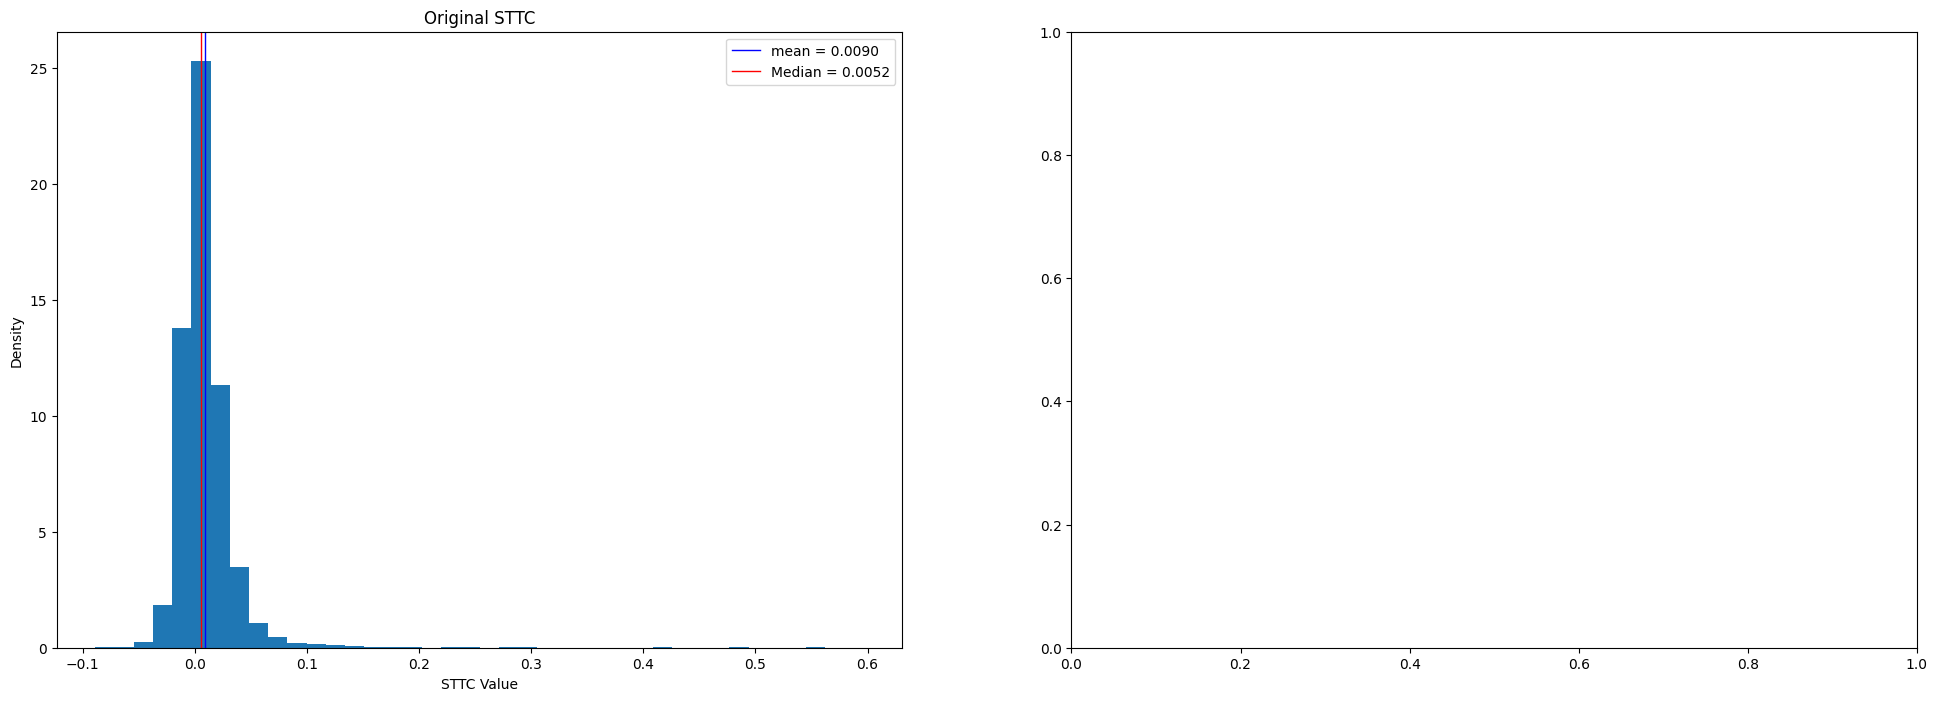

In [186]:
hist_and_bell(sttc_pruned)
hist_and_bell(sttc_pruned2)


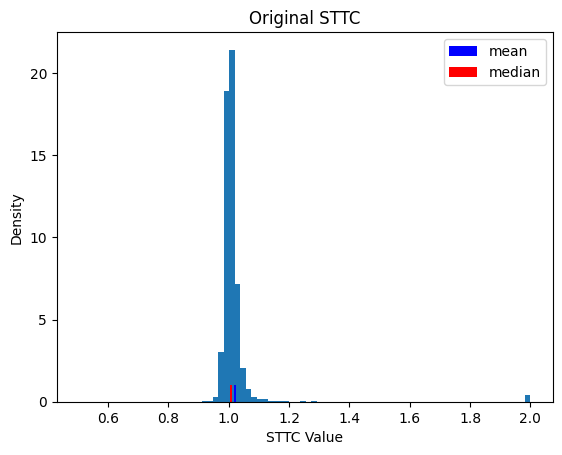

In [121]:
flatSTTC = STTC.flatten()

positveSTTC = flatSTTC + 1



meanhist = np.mean(positveSTTC)
medianhist = np.median(positveSTTC)
plt.hist(positveSTTC, density=True, bins=60)
plt.hist(meanhist, color="blue", width=0.005, bins=60, label="mean")
plt.hist(medianhist, color="red", width=0.005, bins=60, label="median")
plt.xlabel("STTC Value")
plt.ylabel("Density")
plt.title("Original STTC")
plt.legend()

[0.69314718 0.159021   0.02113507 ... 0.03313195 0.03770835 0.69314718]
0.014961546033549005
0.005464654329804244


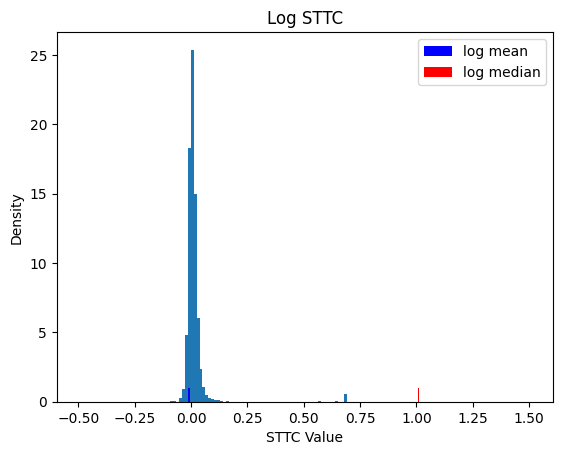

In [123]:

logSTTC = np.log(positveSTTC)

log_mean = np.mean(logSTTC)
log_median = np.median(logSTTC)
print(logSTTC)
print(log_mean)
print(log_median)
plt.hist(logSTTC, density=True, bins=60)
plt.hist(log_median, color="blue", width=0.005, bins=60, label="log mean")
plt.hist(medianhist, color="red", width=0.005, bins=60, label="log median")
plt.xlabel("STTC Value")
plt.ylabel("Density")
plt.title("Log STTC")
plt.legend()

Let's do a test with the randomizations:

In [120]:
interact_manual(hist_and_bell, array=random_select, bin_count=(0,100))

TraitError: Invalid selection: value not found

## Firing Rates

In [188]:
fr = calculate_mean_firing_rates(stitched_data)

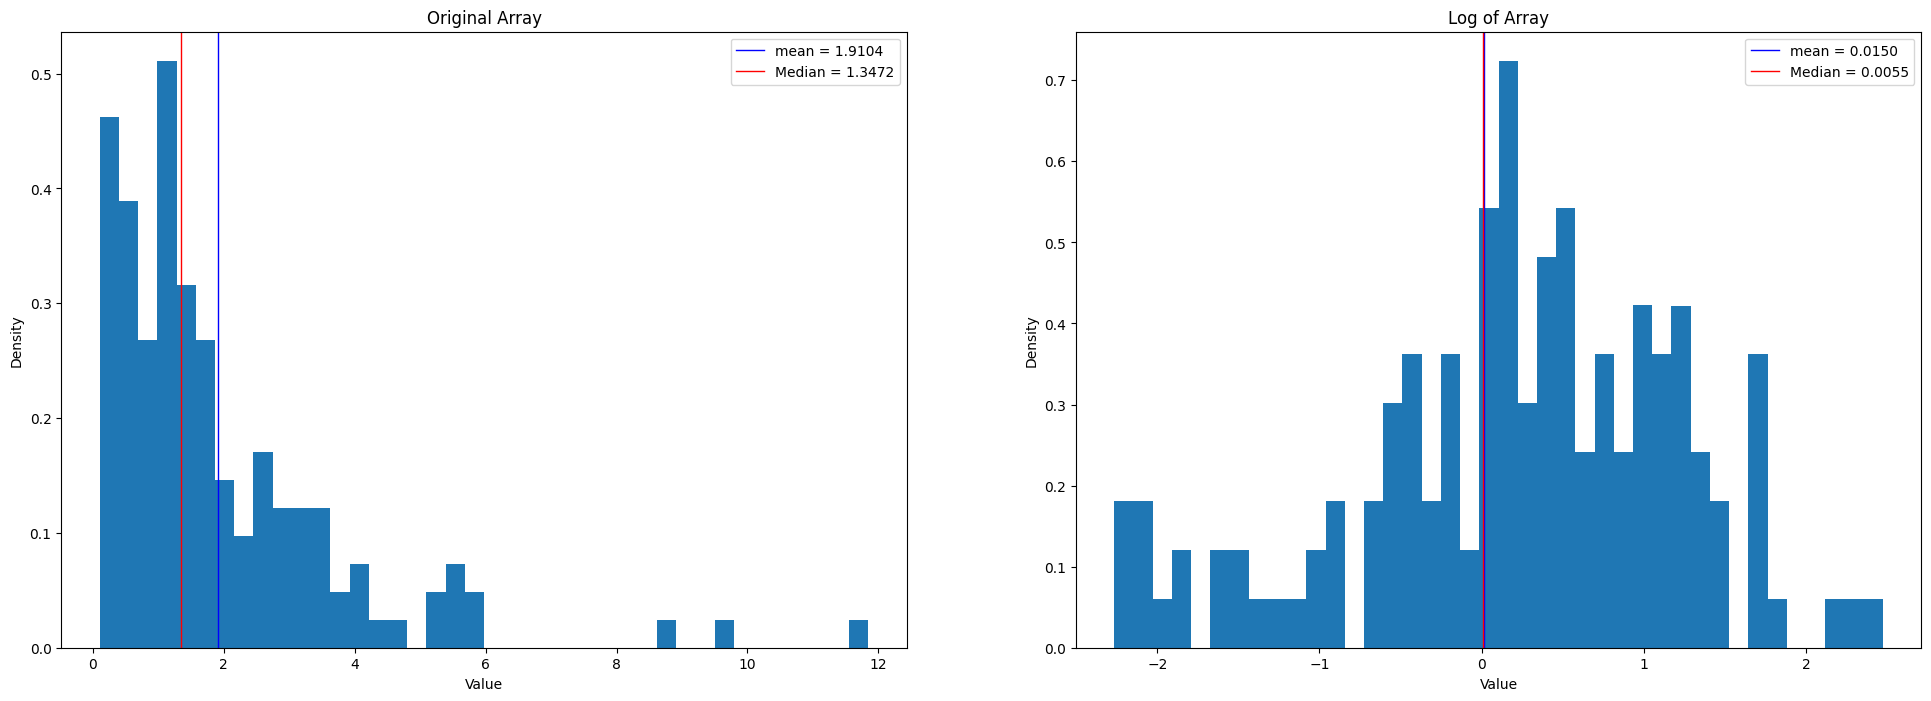

In [192]:
hist_and_bell(fr)